<a href="https://colab.research.google.com/github/asifshakil2267/Cse317-NemericalMethod-ProblemSolvingSheet01/blob/main/Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/autumn_2022/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Polynomial Regression**

In this assignment, you will implement polynomial regression and apply it to the [Assignment 4 Dataset](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/blob/main/datasets/data.csv).

The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

You will need to perform the following regression tasks and find the best one for the dataset.

1.    **Linear Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$ where $X$ is a matrix with two columns, the first column is all 1s and the second column is the feature, and $Y$ is a vector with the labels. $\theta$ is a vector with two elements, $\theta_0$ and $\theta_1$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$$
2. **Quadratic Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x + \theta_2 x^2$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with three columns, the first column is all 1s, the second column is the feature, and the third column is the feature squared, and $Y$ is a vector with the labels. $\theta$ is a vector with three elements, $\theta_0$, $\theta_1$, and $\theta_2$. The $X$ matrix will look like this:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 \end{bmatrix}$$
3. **Cubic Regression:**

     The equation we are trying to fit is:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with four columns, the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed, and $Y$ is a vector with the labels. $\theta$ is a vector with four elements, $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 \end{bmatrix}$$

Take 15 data points from the dataset and use them as the training set. Use the remaining data points as the test set. For each regression task, find the best $\theta$ vector using the training set. Then, calculate the mean squared error (MSE) on the test set. Plot the training set, the test set (in a different color), and the best fit line for each regression task. Which regression task gives the best fit line? Which regression task gives the lowest MSE on the test set? Report your answers in a Markdown cell.

**Note:** Do not use any built-in functions like `np.polyfit` or `sklearn.linear_model.LinearRegression` or any other built-in functions that perform polynomial regression. You must implement the regression tasks yourself.

Linear Regression Coefficients:
θ₀ (intercept): -19.4697
θ₁ (slope): 10.0906

Mean Squared Error: 367.8867


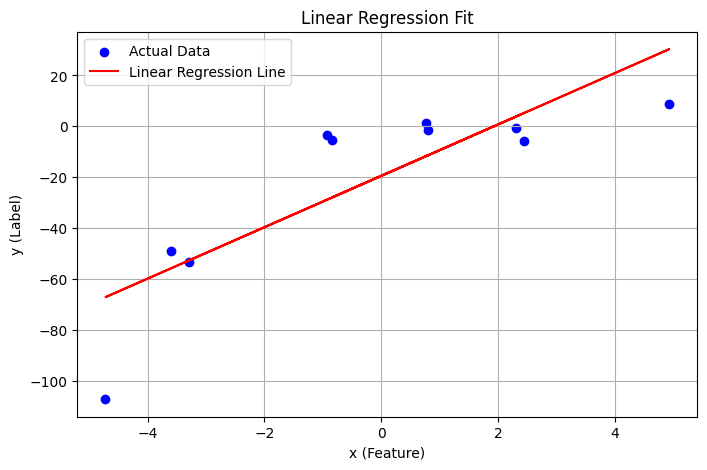

In [ ]:
##01

import numpy as np
import matplotlib.pyplot as plt

# Sample dataset (replace with your actual data)
data = np.array([
    [1, -3.29216, -53.4684],
    [2, 0.799528, -1.26256],
    [3, -0.93621, -3.50619],
    [4, -4.72268, -107.223],
    [5, -3.60267, -49.132],
    [6, 4.931834, 8.901224],
    [7, -0.85027, -5.46624],
    [8, 2.454072, -5.76263],
    [9, 2.309657, -0.60059],
    [10, 0.768204, 1.222678]
])

# Extract features (x) and labels (y)
x = data[:, 1]
y = data[:, 2]

# Create the design matrix X (with column of 1s and features)
X = np.column_stack([np.ones(len(x)), x])

# Calculate theta using the normal equation: theta = (X^T X)^-1 X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the coefficients
print("Linear Regression Coefficients:")
print(f"θ₀ (intercept): {theta[0]:.4f}")
print(f"θ₁ (slope): {theta[1]:.4f}")

# Make predictions
y_pred = X @ theta

# Calculate Mean Squared Error
mse = np.mean((y - y_pred) ** 2)
print(f"\nMean Squared Error: {mse:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('x (Feature)')
plt.ylabel('y (Label)')
plt.legend()
plt.grid(True)
plt.show()

Quadratic Regression Coefficients:
θ₀ (constant term): -3.4157
θ₁ (linear term): 9.5670
θ₂ (quadratic term): -1.9102

Mean Squared Error: 105.4516


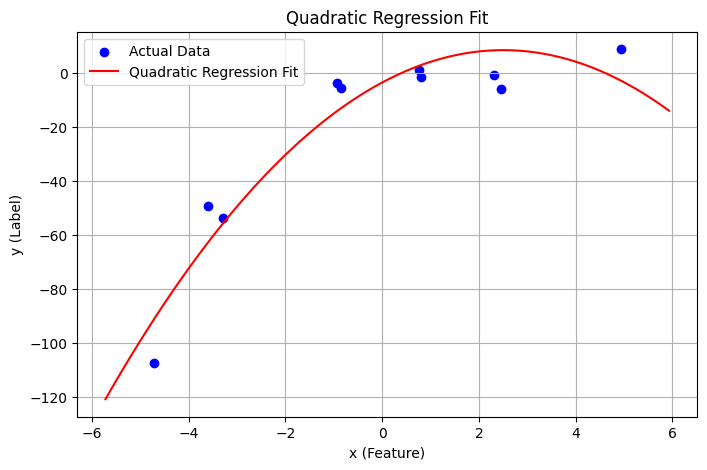

In [ ]:
##02
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset (same as before)
data = np.array([
    [1, -3.29216, -53.4684],
    [2, 0.799528, -1.26256],
    [3, -0.93621, -3.50619],
    [4, -4.72268, -107.223],
    [5, -3.60267, -49.132],
    [6, 4.931834, 8.901224],
    [7, -0.85027, -5.46624],
    [8, 2.454072, -5.76263],
    [9, 2.309657, -0.60059],
    [10, 0.768204, 1.222678]
])

# Extract features (x) and labels (y)
x = data[:, 1]
y = data[:, 2]

# Create the design matrix X (with 1s, x, and x² terms)
X = np.column_stack([np.ones(len(x)), x, x**2])

# Calculate theta using the normal equation: theta = (X^T X)^-1 X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the coefficients
print("Quadratic Regression Coefficients:")
print(f"θ₀ (constant term): {theta[0]:.4f}")
print(f"θ₁ (linear term): {theta[1]:.4f}")
print(f"θ₂ (quadratic term): {theta[2]:.4f}")

# Make predictions
y_pred = X @ theta

# Calculate Mean Squared Error
mse = np.mean((y - y_pred) ** 2)
print(f"\nMean Squared Error: {mse:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Actual Data')

# Create smooth curve for quadratic fit
x_plot = np.linspace(min(x)-1, max(x)+1, 100)
X_plot = np.column_stack([np.ones(len(x_plot)), x_plot, x_plot**2])
y_plot = X_plot @ theta

plt.plot(x_plot, y_plot, color='red', label='Quadratic Regression Fit')
plt.title('Quadratic Regression Fit')
plt.xlabel('x (Feature)')
plt.ylabel('y (Label)')
plt.legend()
plt.grid(True)
plt.show()

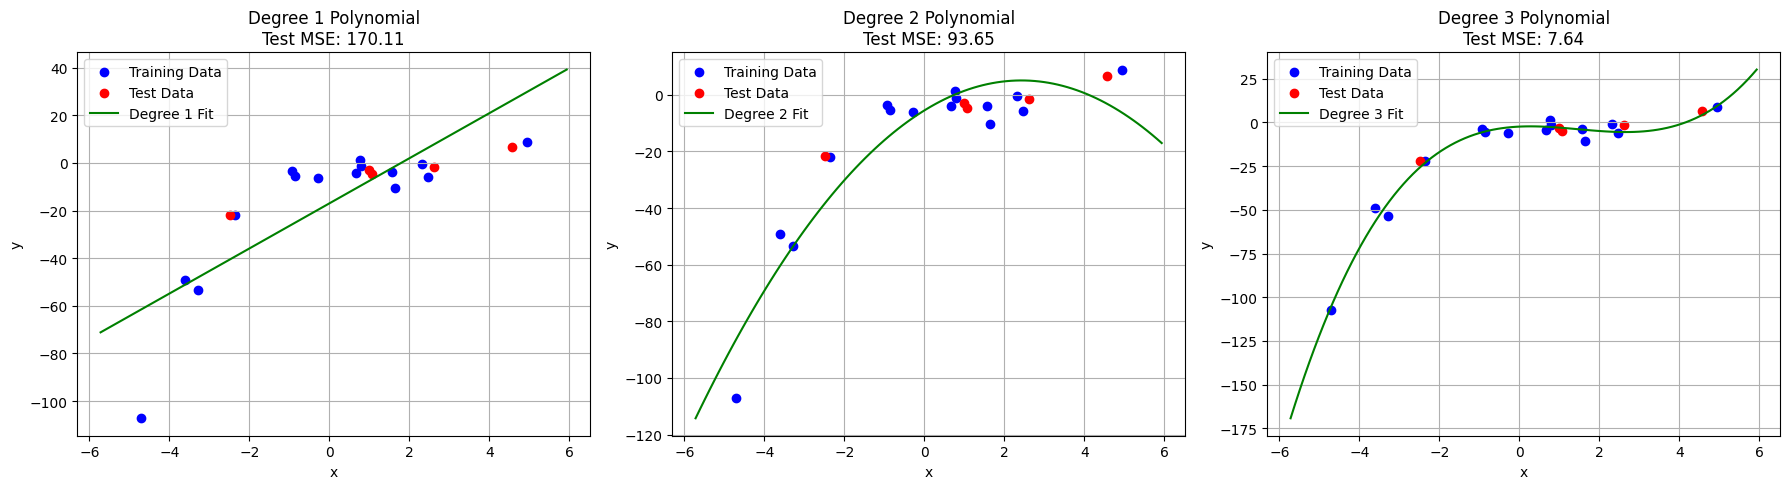

Regression Results Comparison:

Degree 1 Polynomial:
Coefficients: ['θ0', 'θ1']
Values: [-16.95221787   9.46835766]
Test MSE: 170.1102

Degree 2 Polynomial:
Coefficients: ['θ0', 'θ1', 'θ2']
Values: [-5.50819765  8.71734051 -1.79770008]
Test MSE: 93.6499

Degree 3 Polynomial:
Coefficients: ['θ0', 'θ1', 'θ2', 'θ3']
Values: [-2.35477402  1.05904915 -2.13182094  0.48560343]
Test MSE: 7.6421

Best Model: Degree 3 Polynomial
Lowest Test MSE: 7.6421


In [ ]:
##03
import numpy as np
import matplotlib.pyplot as plt

# Full dataset (20 points)
data = np.array([
    [1, -3.29216, -53.4684],
    [2, 0.799528, -1.26256],
    [3, -0.93621, -3.50619],
    [4, -4.72268, -107.223],
    [5, -3.60267, -49.132],
    [6, 4.931834, 8.901224],
    [7, -0.85027, -5.46624],
    [8, 2.454072, -5.76263],
    [9, 2.309657, -0.60059],
    [10, 0.768204, 1.222678],
    [11, 1.567869, -3.95664],
    [12, -2.36282, -21.9899],
    [13, -0.28311, -6.11812],
    [14, 1.634975, -10.4684],
    [15, 0.66841, -4.11956],
    [16, 0.998977, -3.02942],
    [17, -2.48224, -21.7615],
    [18, 2.615475, -1.51295],
    [19, 1.060797, -4.75491],
    [20, 4.562287, 6.507233]
])

# Split into training (15 points) and test (5 points)
train_data = data[:15]
test_data = data[15:]

x_train, y_train = train_data[:, 1], train_data[:, 2]
x_test, y_test = test_data[:, 1], test_data[:, 2]

# Function to create design matrix
def create_design_matrix(x, degree):
    return np.column_stack([x**d for d in range(degree + 1)])

# Function to perform polynomial regression
def polynomial_regression(x, y, degree):
    X = create_design_matrix(x, degree)
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Function to calculate MSE
def calculate_mse(x, y, theta):
    X = create_design_matrix(x, len(theta)-1)
    y_pred = X @ theta
    return np.mean((y - y_pred) ** 2)

# Perform regressions for degrees 1, 2, 3
results = {}
degrees = [1, 2, 3]

for degree in degrees:
    # Train model
    theta = polynomial_regression(x_train, y_train, degree)

    # Calculate test MSE
    test_mse = calculate_mse(x_test, y_test, theta)

    # Store results
    results[degree] = {
        'theta': theta,
        'test_mse': test_mse
    }

# Plot results
plt.figure(figsize=(18, 5))
x_plot = np.linspace(min(data[:, 1])-1, max(data[:, 1])+1, 100)

for i, degree in enumerate(degrees):
    plt.subplot(1, 3, i+1)

    # Plot data points
    plt.scatter(x_train, y_train, color='blue', label='Training Data')
    plt.scatter(x_test, y_test, color='red', label='Test Data')

    # Plot regression curve
    X_plot = create_design_matrix(x_plot, degree)
    y_plot = X_plot @ results[degree]['theta']
    plt.plot(x_plot, y_plot, color='green', label=f'Degree {degree} Fit')

    plt.title(f'Degree {degree} Polynomial\nTest MSE: {results[degree]["test_mse"]:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print results summary
print("Regression Results Comparison:")
for degree in degrees:
    print(f"\nDegree {degree} Polynomial:")
    print(f"Coefficients: {['θ'+str(i) for i in range(degree+1)]}")
    print(f"Values: {results[degree]['theta']}")
    print(f"Test MSE: {results[degree]['test_mse']:.4f}")

# Determine best model
best_degree = min(results.keys(), key=lambda k: results[k]['test_mse'])
print(f"\nBest Model: Degree {best_degree} Polynomial")
print(f"Lowest Test MSE: {results[best_degree]['test_mse']:.4f}")